In [31]:
import pandas as pd
import seaborn as sns
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [32]:
# download zip and read csv from https://www.kaggle.com/competitions/36903/leaderboard/download/public
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

resp = urlopen("https://www.kaggle.com/competitions/36903/leaderboard/download/public")
zipfile = ZipFile(BytesIO(resp.read())) 
filename = 'predict-house-price-econometra-en-r-2022-publicleaderboard.csv'
leaderboard = pd.read_csv(zipfile.open(filename))
leaderboard

,TeamId,TeamName,SubmissionDate,Score
0,8673429,Jaime Eduardo Mercar Chonay,2022-07-03 19:26:29,30488.39815
1,8777582,José & Velvet,2022-07-03 17:14:17,34016.21682
2,8815728,Roberto G / Lauriano F,2022-07-03 18:01:52,34716.45751
3,8739060,Claudia-Dennis,2022-07-03 23:48:18,35016.58357
4,8795723,Gersson Guoz,2022-07-02 03:31:50,35675.88621
5,8835231,Luis Martínez / Cesar Polanco,2022-07-01 22:09:04,36173.60488
6,8843709,Michelle Anabel Bloomfield Fong,2022-07-02 04:31:41,37919.26434
7,8835747,Esteban Camargo / Ingrid Perez,2022-07-03 23:48:08,40307.88816
8,8762895,Flor & Darling,2022-07-03 00:38:25,42329.06813
9,8802254,Erick Picén,2022-07-03 01:29:00,45761.99217


In [33]:
# checkamos los cuantiles
leaderboard.describe()

,TeamId,Score
count,3.000000e+01,30.000000
mean,8.786146e+06,60861.797836
std,5.549506e+04,20338.369148
min,8.666335e+06,30488.398150
25%,8.760232e+06,40813.183153
50%,8.798988e+06,66799.801750
75%,8.834278e+06,71624.021355
max,8.843709e+06,119057.259820


In [34]:
# add a new column depending on the quantile of the Score
leaderboard['Score_quantile'] = pd.qcut(leaderboard['Score'], 4)
leaderboard

,TeamId,TeamName,SubmissionDate,Score,Score_quantile
0,8673429,Jaime Eduardo Mercar Chonay,2022-07-03 19:26:29,30488.39815,"(30488.397, 40813.183]"
1,8777582,José & Velvet,2022-07-03 17:14:17,34016.21682,"(30488.397, 40813.183]"
2,8815728,Roberto G / Lauriano F,2022-07-03 18:01:52,34716.45751,"(30488.397, 40813.183]"
3,8739060,Claudia-Dennis,2022-07-03 23:48:18,35016.58357,"(30488.397, 40813.183]"
4,8795723,Gersson Guoz,2022-07-02 03:31:50,35675.88621,"(30488.397, 40813.183]"
5,8835231,Luis Martínez / Cesar Polanco,2022-07-01 22:09:04,36173.60488,"(30488.397, 40813.183]"
6,8843709,Michelle Anabel Bloomfield Fong,2022-07-02 04:31:41,37919.26434,"(30488.397, 40813.183]"
7,8835747,Esteban Camargo / Ingrid Perez,2022-07-03 23:48:08,40307.88816,"(30488.397, 40813.183]"
8,8762895,Flor & Darling,2022-07-03 00:38:25,42329.06813,"(40813.183, 66799.802]"
9,8802254,Erick Picén,2022-07-03 01:29:00,45761.99217,"(40813.183, 66799.802]"


<AxesSubplot:xlabel='Score', ylabel='TeamName'>

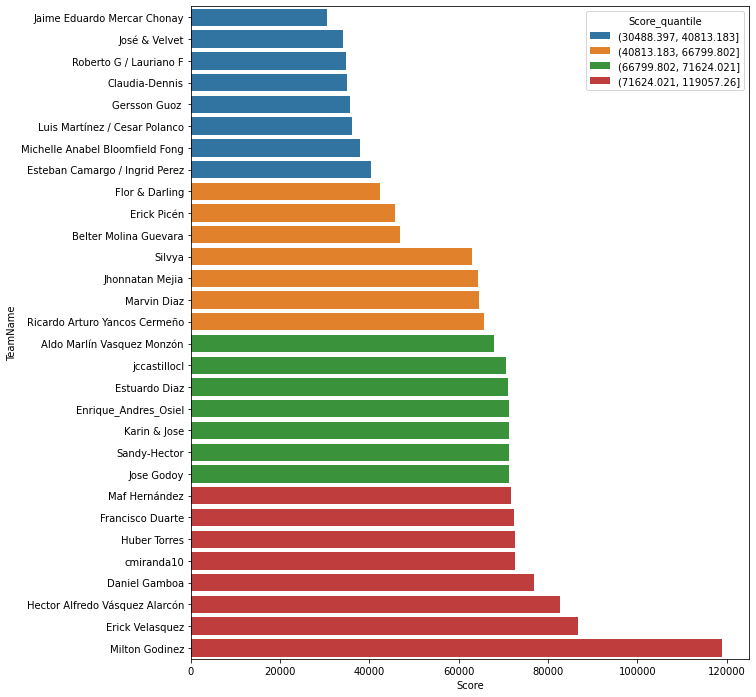

In [35]:
# plot the data
fig, ax = plt.subplots(figsize=(10,12))
sns.barplot(x='Score', y='TeamName', data=leaderboard, ax=ax, hue='Score_quantile', dodge=False)

<AxesSubplot:xlabel='Score', ylabel='Count'>

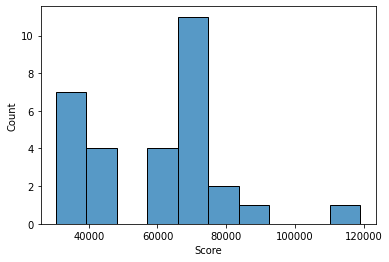

In [36]:
sns.histplot(x='Score', data=leaderboard, bins=10)